# **Giải nén dataset**

In [ ]:
pwd


'/content'

In [ ]:
cd /content/drive/My Drive/Google Colab/flash29_2

/content/drive/My Drive/Google Colab/flash29_2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data_dir = './'

In [ ]:
!unzip -q train-images-deleted-div.zip -d $data_dir

# **Chia dataset thành 2 tập train và valid**

In [ ]:
!pip install split_folders

In [ ]:
import split_folders

In [ ]:
dataset_path = '/content/drive/My Drive/Google Colab/flash29_2/train images'
split_folders.ratio(dataset_path, output="output-train-images", seed=1337, ratio=(.8, .2))

Copying files: 67722 files [09:33, 118.12 files/s]


#**Build và train model**

In [ ]:
cd /content/drive/My Drive/Google Colab/flash29_2

/content/drive/My Drive/Google Colab/flash29_2


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape=(200, 200, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Convolution2D(16, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5))  #bổ sung thêm lớp Dropout
classifier.add(Flatten())
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(18, activation='softmax')) #bỏ lớp div nên số classes còn 18

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               9

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   )

test_datagen = ImageDataGenerator(rescale=1. / 255)

# cl = ['-', '+', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'times', 'div', 'X', 'y', 'z', '(', ')']
cl = ['-', '+', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'times', 'X', 'y', 'z', '(', ')']
data_train = './output-train-images/train'
data_test = './output-train-images/val'

training_set = train_datagen.flow_from_directory(data_train,
                                                 target_size=(200, 200),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 color_mode="grayscale",
                                                 classes=cl
                                                 )

test_set = test_datagen.flow_from_directory(data_test,
                                            target_size=(200, 200),
                                            batch_size=32,
                                            class_mode='categorical',
                                            color_mode="grayscale",
                                            classes=cl
                                            )

Using TensorFlow backend.


Found 54170 images belonging to 18 classes.
Found 13552 images belonging to 18 classes.


In [ ]:
#Kiểm tra vị trí nào tương ứng với class nào
test_set.class_indices

{'(': 16,
 ')': 17,
 '+': 1,
 '-': 0,
 '0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 'X': 13,
 'times': 12,
 'y': 14,
 'z': 15}

In [ ]:
history = classifier.fit_generator(training_set,
                         epochs=10,
                         validation_data=test_set,

                         )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1693/1693 [==============================] - 245s 145ms/step - loss: 0.4989 - accuracy: 0.8458 - val_loss: 0.1658 - val_accuracy: 0.9502
Epoch 2/10
1693/1693 [==============================] - 244s 144ms/step - loss: 0.2039 - accuracy: 0.9351 - val_loss: 0.1134 - val_accuracy: 0.9651
Epoch 3/10
1693/1693 [==============================] - 247s 146ms/step - loss: 0.1516 - accuracy: 0.9504 - val_loss: 0.1143 - val_accuracy: 0.9649
Epoch 4/10
1693/1693 [==============================] - 245s 145ms/step - loss: 0.1253 - accuracy: 0.9599 - val_loss: 0.0945 - val_accuracy: 0.9727
Epoch 5/10
1693/1693 [==============================] - 244s 144ms/step - loss: 0.1117 - accuracy: 0.9633 - val_loss: 0.0927 - val_accuracy: 0.9739
Epoch 6/10
1693/1693 [==============================] - 242s 143ms/step - loss: 0.0999 - accuracy: 0.9668 - val_loss: 0.0708 - val_accuracy: 0.9776
Epoch 7/10
1693/1693 [==============

# **Vẽ đồ thị dựa vào biến history**

In [ ]:
from matplotlib import pyplot as plt

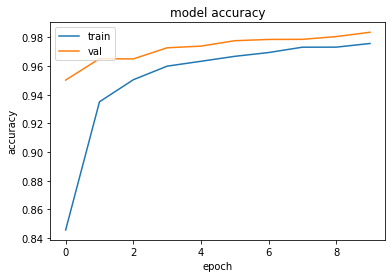

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

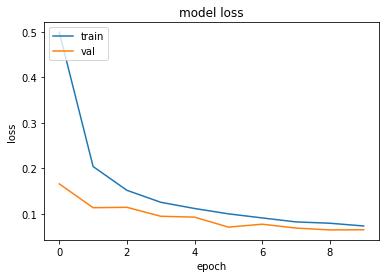

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#**Lưu model**

In [ ]:
# to save the model
model_json = classifier.to_json()
with open("model_colab_train-images-epoch10.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to
classifier.save_weights("model_colab_train-images-epoch10.h5")

In [ ]:
from google.colab import files
files.download('model_colab_train-images-epoch10.json')
files.download('model_colab_train-images-epoch10.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Đếm số lượng file trong các thư mục**

In [ ]:
import os, os.path

print(os.listdir('./train images'))
dirs = os.listdir('./train images')
# path joining version for other paths
for subdir in dirs:
  print(subdir)
  subdir = './train images/' + subdir
  print(len([name for name in os.listdir(subdir) if os.path.isfile(os.path.join(subdir, name))]))
DIR = './train images'


['(', ')', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'times', 'X', 'y', 'z']
(
4071
)
4005
+
4032
-
4152
0
3834
1
4056
2
4260
3
3516
4
4032
5
3544
6
3117
7
2908
8
3067
9
3736
times
3250
X
4005
y
4005
z
4132


# **ĐƯA ẢNH BIỂU THỨC VÀO ĐỂ NHẬN DẠNG**

In [ ]:
cd /content/drive/My Drive/Google Colab/flash29_2

/content/drive/My Drive/Google Colab/flash29_2


In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import model_from_json
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
K.set_image_data_format('channels_last')

In [ ]:
json_file = open('model_colab_train-images-epoch10.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model_colab_train-images-epoch10.h5")

In [ ]:
image = cv2.imread('test/v3.jpg')

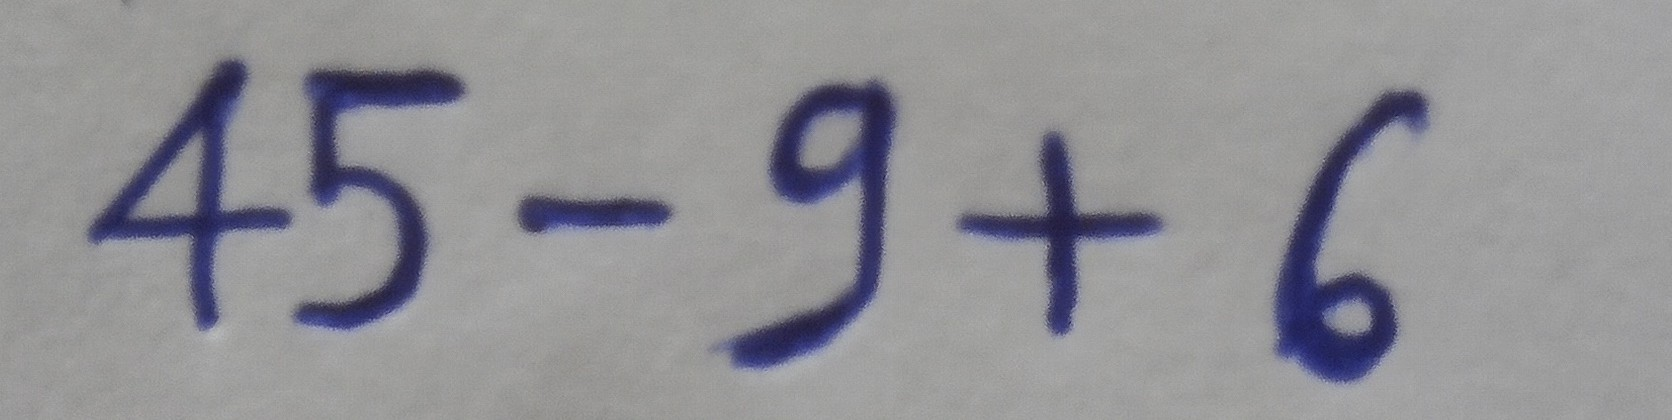

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

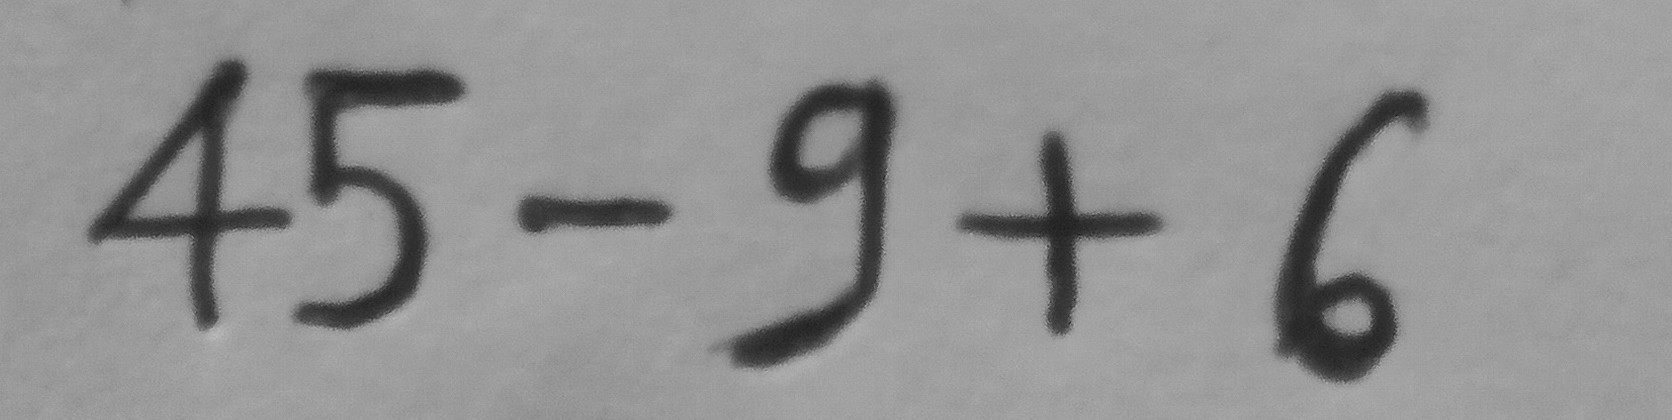

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

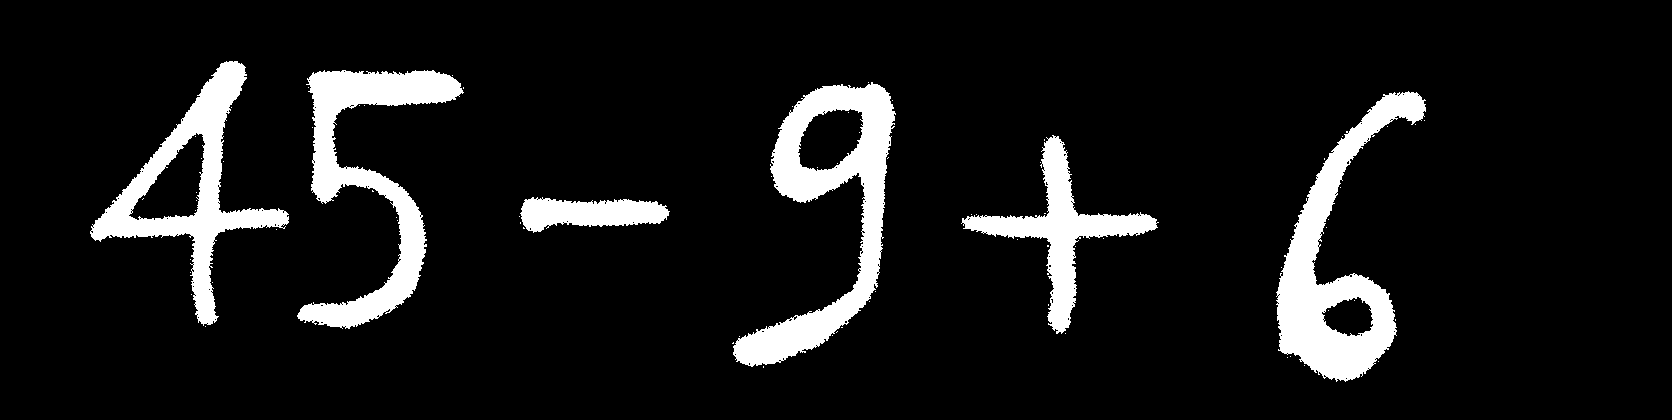

In [ ]:
ret, thresh = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh)

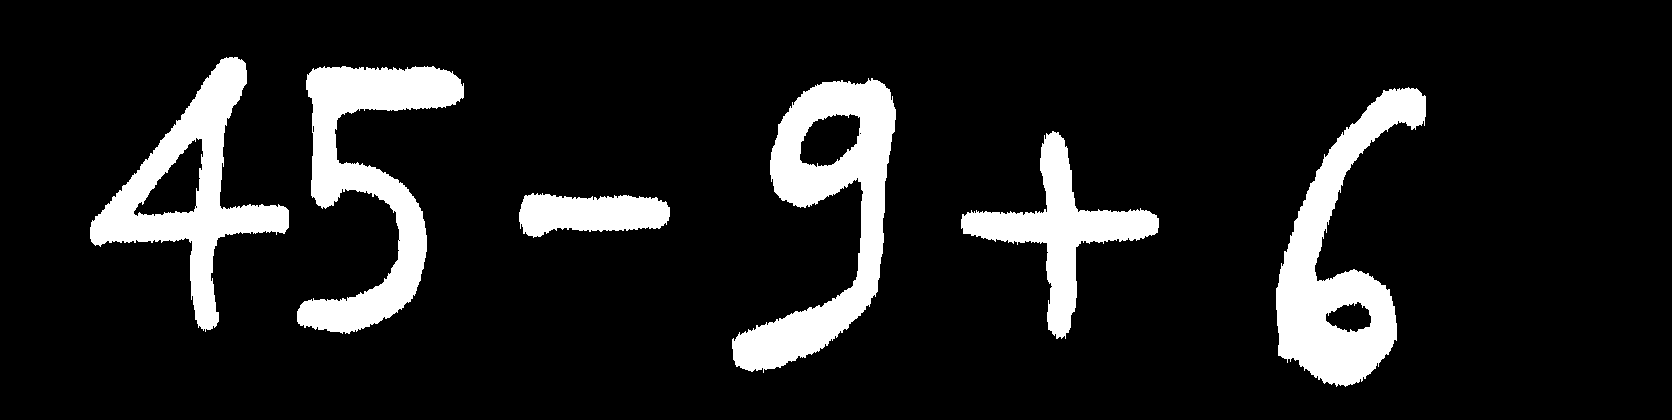

In [ ]:
kernel = np.ones((10, 1), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
cv2_imshow(img_dilation)

In [ ]:
ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

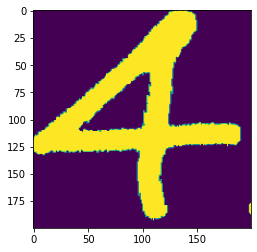

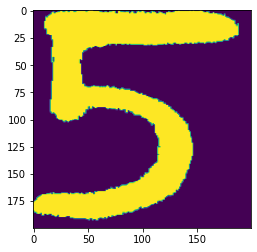

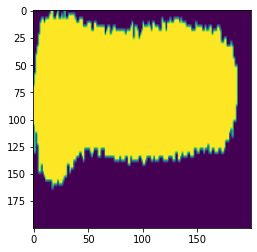

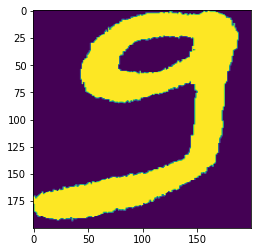

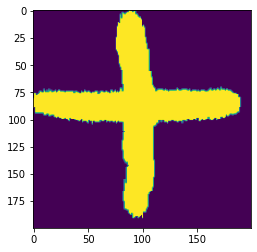

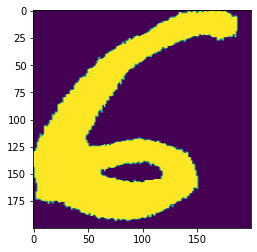

In [ ]:
train_data = []
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # im_crop = thresh[y:y + h + 10, x:x + w + 10]
    # im_crop = thresh[y:y + h, x:x + w]

    im_crop = img_dilation[y:y + h + 10, x:x + w + 10]
    # im_crop = img_dilation[y:y + h, x:x + w]

    im_resize = cv2.resize(im_crop, (200, 200))
    plt.imshow(im_resize)
    plt.show()

    im_resize = np.reshape(im_resize, (200, 200, 1))
    train_data.append(im_resize)

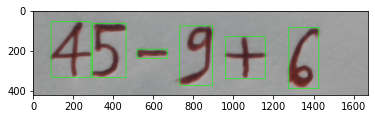

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
#DỰ ĐOÁN:
r = ''
for i in range(len(train_data)):
    train_data[i] = np.array(train_data[i])
    train_data[i] = train_data[i].reshape(1, 200, 200, 1)
    result = loaded_model.predict_classes(train_data[i])
    # print(result)
    if (result[0] == 0):
        r = r + '-'
    if (result[0] == 1):
        r = r + '+'
    if (result[0] == 2):
        r = r + '0'
    if (result[0] == 3):
        r = r + '1'
    if (result[0] == 4):
        r = r + '2'
    if (result[0] == 5):
        r = r + '3'
    if (result[0] == 6):
        r = r + '4'
    if (result[0] == 7):
        r = r + '5'
    if (result[0] == 8):
        r = r + '6'
    if (result[0] == 9):
        r = r + '7'
    if (result[0] == 10):
        r = r + '8'
    if (result[0] == 11):
        r = r + '9'
    if (result[0] == 12):
        r = r + '*'
    if (result[0] == 13):
        r = r + 'X'
    if (result[0] == 14):
        r = r + 'y'
    if (result[0] == 15):
        r = r + 'z'
    if (result[0] == 16):
        r = r + '('
    if (result[0] == 17):
        r = r + ')'

print(r)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
45X8z6
